<a href="https://colab.research.google.com/github/Highashikata/Data-Science--Decision-Tree---Customer-Churn-Prediction/blob/main/Decision_Tree_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Classification - Decision Tree Algorithm --> Customer Churn Prediction**



In [ ]:
# Importing the useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# To install these libraries type "pip install numpy scipy scikit-learn" in the anaconda terminal

# Tip : Increase the size of sns plots
sns.set(rc = {'figure.figsize':(8,6)})

# Datetime library
from pandas import to_datetime
import datetime

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# For the first time with the lib type "pip install graphviz"
# "conda install python-graphviz"


In [ ]:
# pip install graphviz

In [ ]:
#### Importing the data to google colab
from google.colab import files
uploaded = files.upload()

Saving Customer_data.csv to Customer_data.csv


In [ ]:
# Reading the data

data = pd.read_csv('Customer_data.csv')

display("The Dimension of the Dataset is {}".format(data.shape), data.head())

'The Dimension of the Dataset is (10000, 14)'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Copying the DataFrame
df = data.copy()

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  unique_values = np.unique(df[column])
  nbr_values = len(unique_values)
  if nbr_values < 36:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, unique_values, nbr_values))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, nbr_values))

The Number of values for the Feature RowNumber : 10000
The Number of values for the Feature CustomerId : 10000
The Number of values for the Feature Surname : 2932
The Number of values for the Feature CreditScore : 460
The Number of Values for the Feature Geography : ['France' 'Germany' 'Spain'] ---- 3
The Number of Values for the Feature Gender : ['Female' 'Male'] ---- 2
The Number of values for the Feature Age : 70
The Number of Values for the Feature Tenure : [ 0  1  2  3  4  5  6  7  8  9 10] ---- 11
The Number of values for the Feature Balance : 6382
The Number of Values for the Feature NumOfProducts : [1 2 3 4] ---- 4
The Number of Values for the Feature HasCrCard : [0 1] ---- 2
The Number of Values for the Feature IsActiveMember : [0 1] ---- 2
The Number of values for the Feature EstimatedSalary : 9999
The Number of Values for the Feature Exited : [0 1] ---- 2


In [ ]:
### Data pre-processing : checking for missing values
display(df.isnull().isna().any(), df.isnull().sum())

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
### Displaying the DataFrame columns to find the numeric data
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# ### Pairplotting the data to vizualize the correlation btw features
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# only_numerical_data = df.select_dtypes(include=numerics)

# print(only_numerical_data.columns)

In [ ]:
### We will be excluding the first two features (RowNumber and CustomerID)
only_numerical_data = df[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']] 

In [ ]:
### Pairplotting the data to vizualize the correlation btw features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

only_numerical_data = df.select_dtypes(include=numerics)

print(only_numerical_data.columns)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
### We will be excluding the first two features (RowNumber and CustomerID)
only_numerical_data = df[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',
                          'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']]

display("The Shape of the Only Numerical DataFrame is {}".format(only_numerical_data.shape)
        , only_numerical_data.head())

  

'The Shape of the Only Numerical DataFrame is (10000, 9)'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

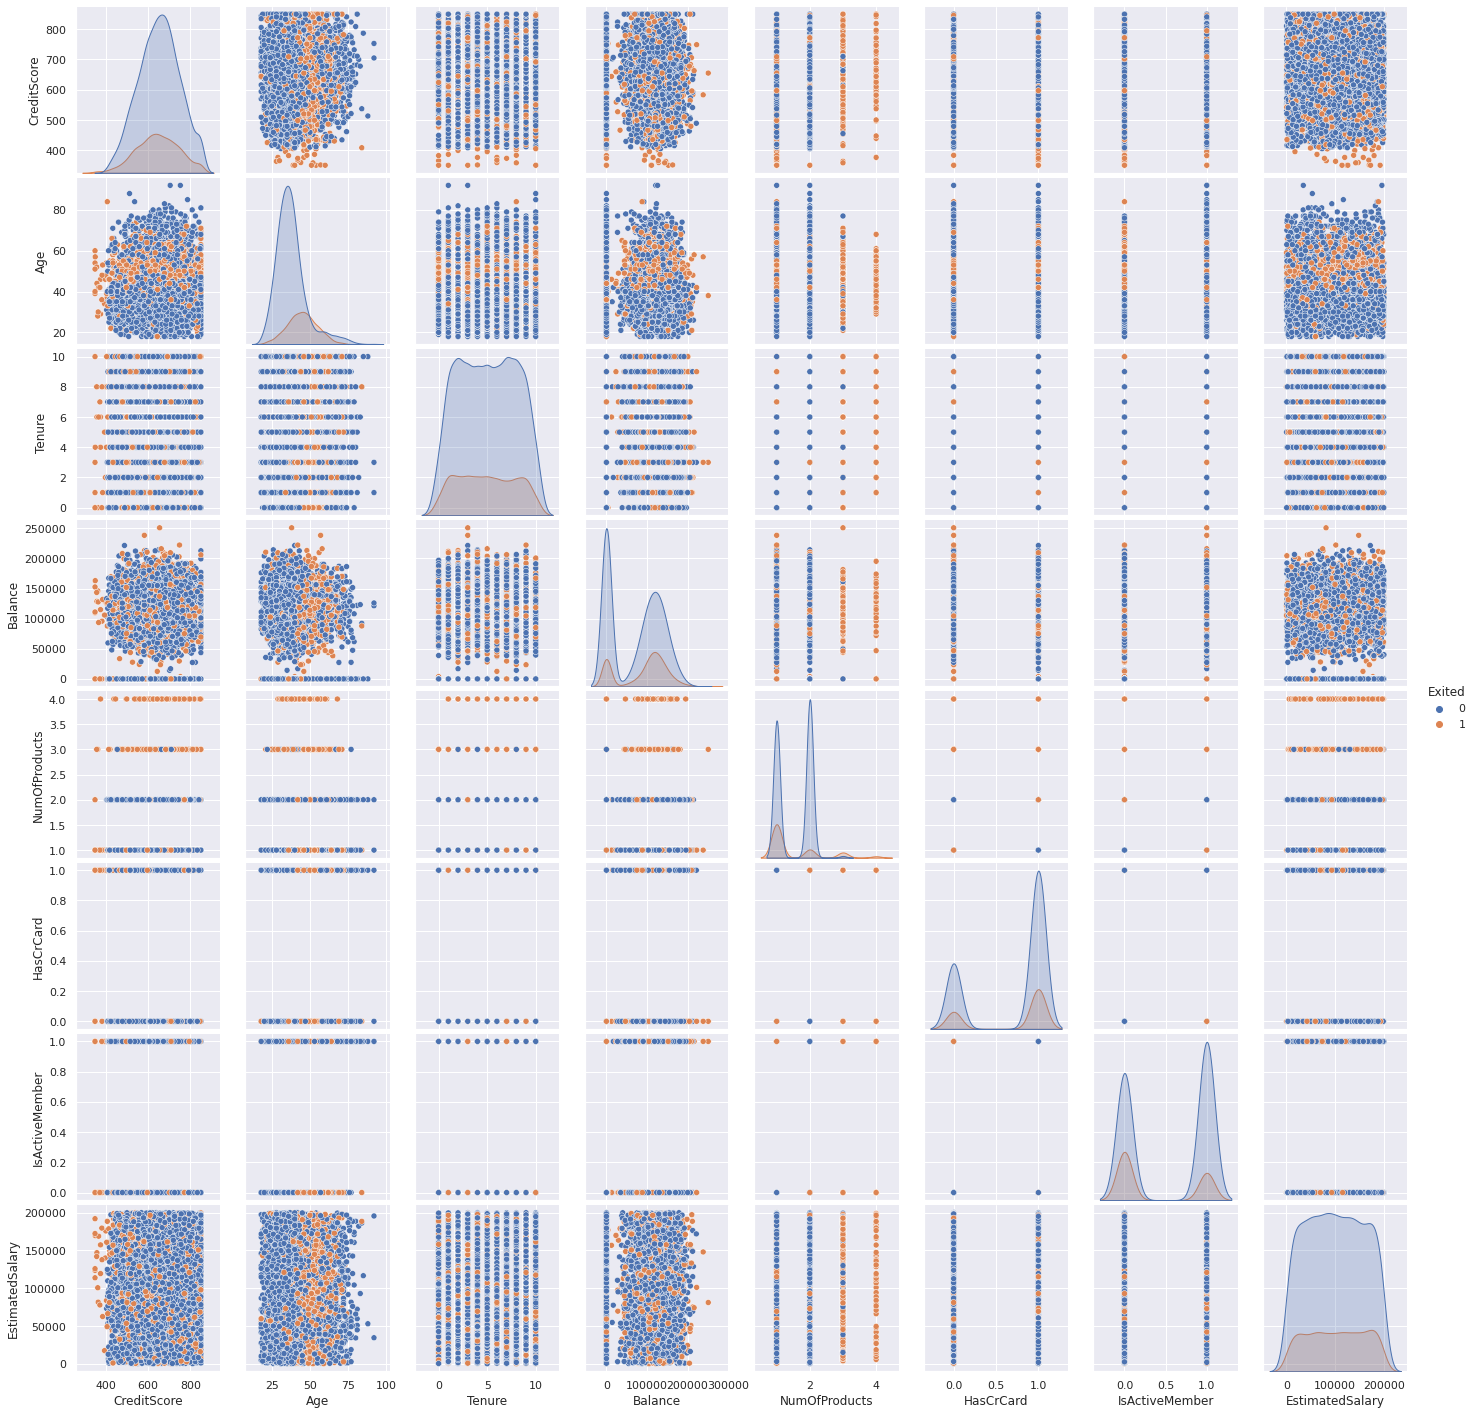

In [ ]:
#### Visualizing the Numerical Data using the seaborn lib
sns.pairplot(only_numerical_data, hue = 'Exited', diag_kws = {'bw': 0.2})

#### **Invistigating Non Numeric Data Using the countplot**




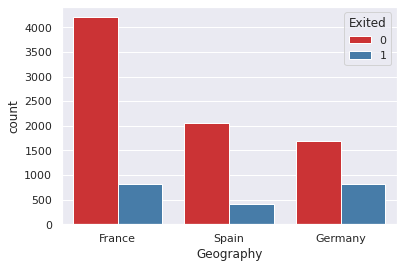

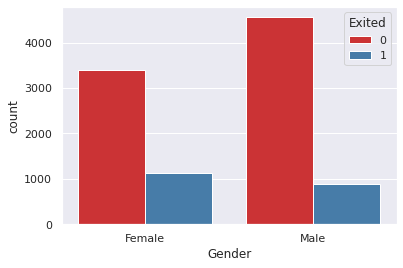

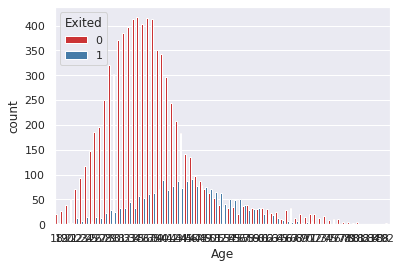

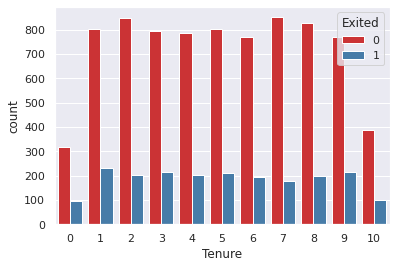

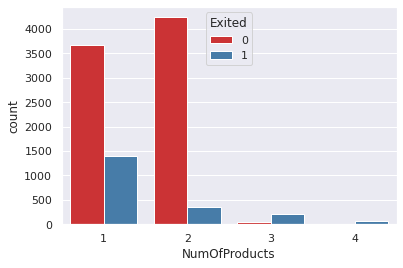

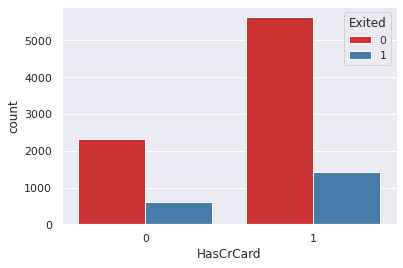

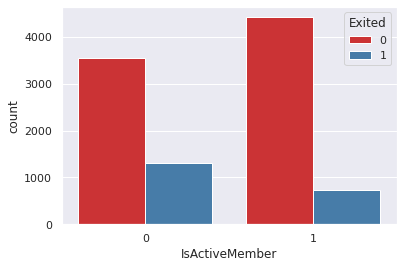

In [ ]:
Non_Numeric_Features = ['Geography', 'Gender', 'Age', 'Tenure', 
                        'NumOfProducts', 'HasCrCard', 'IsActiveMember']

new_data_lim = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

for feature in Non_Numeric_Features:
    plt.figure()
    ax = sns.countplot(x = feature, data = new_data_lim, hue = 'Exited', palette = "Set1")

#### **Converting the categorical data into numerical one**

In [ ]:
new_data_set = pd.get_dummies(new_data_lim, 
                              columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
new_data_set.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


#### **Scaling the Data**

In [ ]:
columns_to_scale = ['CreditScore', 'EstimatedSalary', 'Balance', 'Age']
scaler = MinMaxScaler()
new_data_set[columns_to_scale] = scaler.fit_transform(new_data_set[columns_to_scale])
display(new_data_set.head(10), new_data_set[columns_to_scale])


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1
5,0.590,0.351351,8,0.453394,2,0.748797,1,0,0,1,0,1,0,1,1,0
6,0.944,0.432432,7,0.000000,2,0.050261,0,1,0,0,0,1,0,1,0,1
7,0.052,0.148649,4,0.458540,4,0.596733,1,0,1,0,1,0,0,1,1,0
8,0.302,0.351351,4,0.566170,2,0.374680,0,1,0,0,0,1,1,0,0,1
9,0.668,0.121622,2,0.536488,1,0.358605,0,1,0,0,0,1,0,1,0,1


,CreditScore,EstimatedSalary,Balance,Age
0,0.538,0.506735,0.000000,0.324324
1,0.516,0.562709,0.334031,0.310811
2,0.304,0.569654,0.636357,0.324324
3,0.698,0.469120,0.000000,0.283784
4,1.000,0.395400,0.500246,0.337838
...,...,...,...,...
9995,0.842,0.481341,0.000000,0.283784
9996,0.332,0.508490,0.228657,0.229730
9997,0.718,0.210390,0.000000,0.243243
9998,0.844,0.464429,0.299226,0.324324


#### **Splitting the Data into X&Ys**

In [ ]:
X = new_data_set.drop('Exited', axis = 1).values
y = new_data_set['Exited'].values
print('The shape of the X data is {}'.format(np.shape(X)))
print("The shape of the Y data is {}".format(np.shape(y)))


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42)

The shape of the X data is (10000, 15)
The shape of the Y data is (10000,)


#### **Building the Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
### Using the Gini Impurity Criterion
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

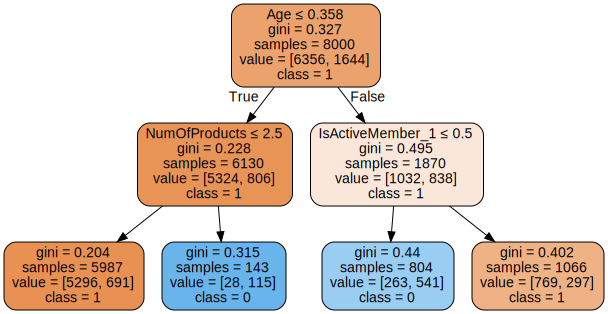

In [ ]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
    feature_names=new_data_set.drop('Exited', axis=1).columns,    
    class_names = new_data_set['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
### Using the Entropy Criterion
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 1)
decision_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

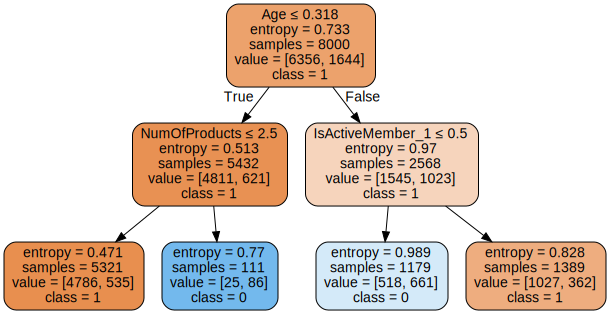

In [ ]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree_entropy, out_file=None, 
    feature_names=new_data_set.drop('Exited', axis=1).columns,    
    class_names = new_data_set['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_data_set.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, decision_tree_entropy.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [decision_tree_entropy.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.613
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.204
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.183


ValueError: ignored

#### **Evaluating the Model**

In [ ]:
# The Accuracy on Train
print("The Accuracy on the Train is : ", decision_tree_entropy.score(X_train, y_train))

# The Accuracy on Testing
print("The Accuracy on Test is : ", decision_tree_entropy.score(X_test, y_test))

The Accuracy on the Train is :  0.82
The Accuracy on Test is :  0.827


In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

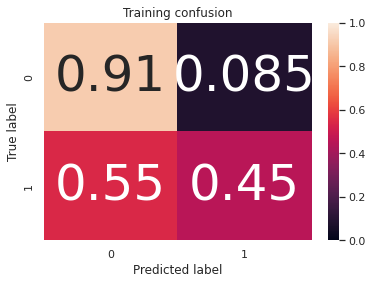

In [ ]:
y_pred = decision_tree_entropy.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes = decision_tree_entropy.classes_, title='Training confusion')

In [ ]:
y_pred = decision_tree_entropy.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[5813,  543],
       [ 897,  747]])

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.91456891 0.45437956]
The Precision per class is:  [0.86631893 0.57906977]
The False Alarm rate per class is:  [0.54562044 0.08543109]
The Miss Rate rate per class is:  [0.08543109 0.54562044]
The Classification error of each class is [0.18 0.18]
The Accuracy of each class is [0.82 0.82]

The average Recall is:  0.684474236654371
The average Precision is:  0.7226943472082625
The average False Alarm is:  0.31552576334562893
The average Miss Rate rate is:  0.31552576334562893
The average Classification error is 0.18
The average Accuracy is 0.82
